In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os, shutil
import glob
from pathlib import Path
import splitfolders

## MRL-Eye Dataset

the dataset consists of 84,898 images from 37 subjects 

Image shape 86 x 86 ; Label : eye state [0 - closed, 1 - open]

Eye images were obtained using the eye detector based on the histogram of oriented gradients (HOG) combined with the SVM classifier

Source: http://mrl.cs.vsb.cz/eyedataset

# Data Preprocessing and splitting into train, test, val

In [ ]:
# dir = "Datasets"
# open_eyes = glob.glob(dir + "/mrlEyes_2018_01/*/*_*_*_*_1_*_*_*.png",recursive=True)
# closed_eyes = glob.glob(dir + "/mrlEyes_2018_01/*/*_*_*_*_0_*_*_*.png",recursive=True)

# Path(dir+"/MRL").mkdir(parents=True, exist_ok=True)
# Path(dir+"/MRL/Open_Eyes").mkdir(parents=True, exist_ok=True)
# Path(dir+"/MRL/Closed_Eyes").mkdir(parents=True, exist_ok=True)

# for file in open_eyes:
#     shutil.copy(file, dir+"/MRL/Open_Eyes")
    
# for file in closed_eyes:
#     shutil.copy(file, dir+"/MRL/Closed_Eyes")

In [3]:
# input_dir = "Datasets/MRL"
# output_dir = "Datasets/MRL"

# splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(0.6, 0.2,0.2))

Copying files: 84898 files [01:30, 935.13 files/s] 


## Reading Dataset

In [4]:
dir = "Datasets/MRL"
labels = {"Closed_Eyes":0,"Open_Eyes":1}
img_size = 224

In [5]:
def create_dataset(folder):
    
    # This function loads images from the folder
    # resizes the images
    
    labels = {"Closed_Eyes":0,"Open_Eyes":1}
    img_size = 224
    images = []
    
    for label in labels:
        img_class = labels[label]
        path = folder+"/"+label
        for filename in os.listdir(path):
            try:
                img = cv2.imread(os.path.join(path,filename), cv2.IMREAD_GRAYSCALE)
                rgb = cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
                img = cv2.resize(rgb, (img_size,img_size))
                images.append([img,img_class])
            except Exception as e:
                pass
    return images

# Create Training Dataset

In [6]:
train = create_dataset(dir+"/train") 
import random
random.shuffle(train)

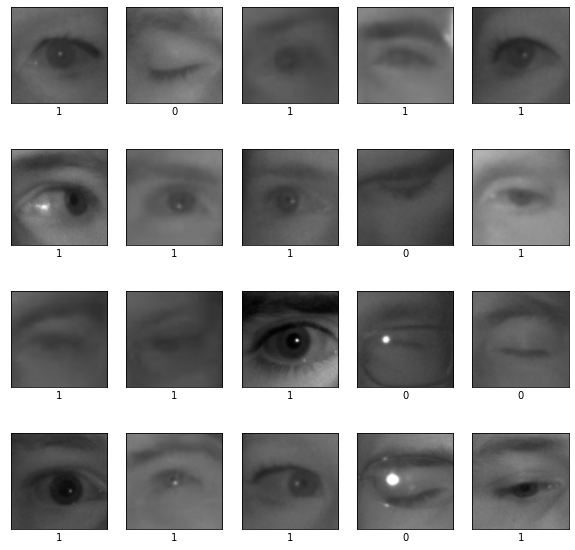

In [12]:
#check train data by plotting first 20 images

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i][0])
    plt.xlabel(train[i][1])
plt.show()


In [13]:
X_train = []
y_train = []

for features, label in train:
    X_train.append(features)
    y_train.append(label)

X_train = np.array(X_train).reshape(-1,img_size,img_size,3)

In [14]:
y_train = np.array(y_train)

In [ ]:
#Normalise the data

from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
import pickle

pickle_out = open("X_train.pickle", wb)
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", wb)
pickle.dump(y_train, pickle_out)
pickle_out.close()

## Create Model

In [ ]:
model = 